In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [4]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [2]:
X_test.shape

NameError: name 'X_test' is not defined

In [26]:
plt.figure(figsize=(16,2))


<Figure size 1152x144 with 0 Axes>

<Figure size 1152x144 with 0 Axes>

In [48]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
Y_train=Y_train.reshape(-1,) #convert 2d array to 1d array -1 means no change the row

In [52]:
Y_train[:5] #one dimension 

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
classes=['aeroplame','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
def print_image(X,y,ind):
    plt.figure(figsize=(15,2))
    plt.imshow(X[ind])
    plt.xlabel(classes[y[ind]])

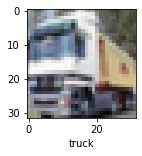

In [20]:
print_image(X_train,Y_train,1)

In [19]:
X_train=X_train/255
X_test=X_test/255
#Normalizing each image of our dataset

TypeError: The added layer must be an instance of class Layer. Found: {<keras.layers.core.Flatten object at 0x000002452705A280>, <keras.layers.convolutional.Conv2D object at 0x00000245270EACA0>, <keras.layers.pooling.MaxPooling2D object at 0x00000245270EAEE0>, <keras.layers.core.Dense object at 0x000002452725D130>, <keras.layers.convolutional.Conv2D object at 0x00000245270EAB50>, <keras.layers.pooling.MaxPooling2D object at 0x000002452705ABB0>, <keras.layers.core.Dense object at 0x000002452725D3D0>}

In [73]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [76]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
cnn.fit(X_train, Y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.4409 - accuracy: 0.4833
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1149 - accuracy: 0.6087
Epoch 3/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9846 - accuracy: 0.6561
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8978 - accuracy: 0.6883
Epoch 5/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8249 - accuracy: 0.7137
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7691 - accuracy: 0.7343
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7157 - accuracy: 0.7501
Epoch 8/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6653 - accuracy: 0.7661
Epoch 9/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6238 - accuracy: 0.7820
Epoch 10/15
1563/1563 [==============================] - 24s 16m

In [79]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0802 - accuracy: 0.6918


[1.080215573310852, 0.6917999982833862]

In [80]:
Y_test=Y_test.reshape(-1,)

In [81]:
Y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

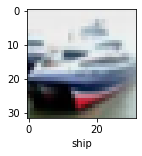

In [83]:
print_image(X_test,Y_test,1)

In [84]:
Y_predict=cnn.predict(X_test)

In [85]:
Y_predict

array([[1.0066858e-02, 4.0549162e-06, 1.5202436e-03, ..., 1.4110030e-05,
        1.5199971e-03, 7.5691974e-06],
       [1.9375514e-02, 4.1787878e-01, 3.1214356e-06, ..., 2.6074937e-07,
        5.6262124e-01, 1.1557764e-04],
       [5.1464006e-02, 3.6078889e-02, 1.3343057e-03, ..., 2.3984783e-03,
        8.8899702e-01, 5.9271436e-03],
       ...,
       [9.5916264e-05, 6.8799591e-06, 1.7456539e-01, ..., 1.5417498e-01,
        1.0030527e-02, 3.0224655e-05],
       [2.6424332e-05, 8.2868375e-03, 2.1715325e-03, ..., 3.3949225e-05,
        1.2892130e-08, 7.1962961e-07],
       [2.2093054e-06, 7.5876745e-09, 9.1523922e-04, ..., 9.7660625e-01,
        3.5714569e-09, 4.9645430e-09]], dtype=float32)

In [88]:
Y_predict=[np.argmax(element) for element in Y_predict]

In [89]:
Y_predict

[3,
 8,
 8,
 0,
 6,
 6,
 3,
 6,
 3,
 1,
 8,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 3,
 4,
 0,
 9,
 6,
 6,
 3,
 4,
 5,
 9,
 3,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 2,
 3,
 7,
 6,
 9,
 0,
 7,
 3,
 8,
 8,
 7,
 5,
 6,
 6,
 7,
 5,
 6,
 2,
 6,
 2,
 1,
 2,
 5,
 7,
 3,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 8,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 8,
 2,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 5,
 4,
 0,
 2,
 2,
 1,
 4,
 0,
 4,
 2,
 5,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 6,
 0,
 2,
 1,
 8,
 9,
 1,
 2,
 1,
 7,
 2,
 8,
 4,
 3,
 6,
 5,
 8,
 7,
 6,
 6,
 7,
 2,
 8,
 9,
 6,
 2,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 4,
 8,
 6,
 5,
 0,
 9,
 9,
 0,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 8,
 5,
 8,
 6,
 2,
 3,
 8,
 5,
 3,
 0,
 1,
 7,
 5,
 8,
 8,
 7,
 8,
 3,
 1,
 8,
 2,
 1,
 3,
 0,
 5,
 7,
 9,
 2,
 0,
 3,
 9,
 8,
 0,
 0,
 9,
 8,
 7,
 7,
 4,
 9,
 5,
 5,
 9,
 4,
 4,
 3,
 6,
 5,
 1,
 3,
 1,
 8,
 0,
 4,
 0,
 3,
 2,
 1,
 1,
 8,
 9,
 0,
 8,
 0,
 8,
 2,
 0,


In [93]:
Y_test[5:10]

array([6, 1, 6, 3, 1], dtype=uint8)

In [94]:
Y_predict[5:10]

[6, 3, 6, 3, 1]

In [91]:
Y_predict[:5]

[3, 8, 8, 0, 6]